Welcome to my notebook entry for Space Titanic Competition.
I'll be going through the process of using binary classification, an attempt to learn more about Data Analysis.

This notebook is following the Complete Guide for this competition.

I'll be covering:
* Exploratory Data Analysis
* Feature Engineering
* Data Cleaning
* Encoding, Scaling and Preprocessing
* Training Machine Learning Models
* Cross Validation and Ensembling Predictions

# 1. Exploratory Data Analysis
- load data
- view sample data
- find shape of data
- view feature descriptions

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

print('Train df shape:', train_df.shape)
print('Test df shape:', test_df.shape)
train_df.info()

Train df shape: (8693, 14)
Test df shape: (4277, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


**Feature Descriptions:**
* PassengerId - Unique id for each passenger. Format: gggg_pp where gggg is the group of the passenger is travelling with and pp is the number that belongs to the individual within that group.
* HomePlanet - the planet the passenger departed from, typically planet of residence. 
* Cryosleep - indicates whether passenger is in this state, being frozen in time for the duration of the voyage. Passengers in this state are confined in their cabins.
* Cabin - the cabin number where the passenger is staying. Format: deck/num/side, where side is either P or S for port or starboard side.
* Destination - planned destination of the passenger. 
* Age - age of the passenger at the time of the voyage.
* VIP - whether the passenger has paid for VIP services for the duration of the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck  - Amount the passenger has been billed for the Ship's luxury amenities.
* Name - the first and last name of the passenger.
* Transported - whether the passenger has been transported to another dimension. This is the target. 

Now lets check for missing values in the dataset.

In [3]:
#the amount of missing values in each column of the training dataframe
print(train_df.isna().sum())
#the amount of missing valeus in each column of the test dataframe
print(test_df.isna().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [4]:
#lets check for the dataset information again
print("train dataset info: ", train_df.info())
print("training dataset uniques:", train_df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
train dataset info:  None
training dataset uniques: PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destin

This tells us that there are 6 continuous features (float64), 4 categorical features  and 3 descriptive/qualitative (object)

***EDA (Exploratory Data Analysis)***

Text(0.5, 1.0, 'Target distribution')

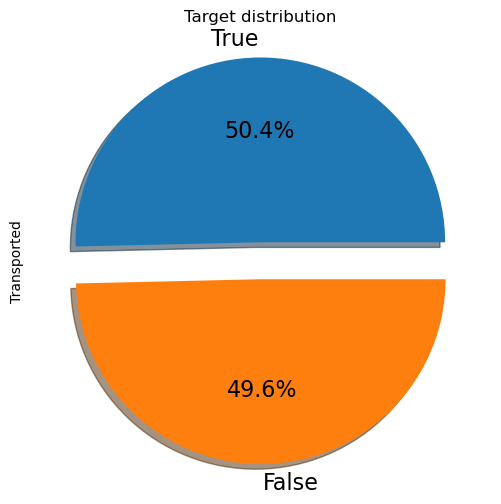

In [5]:
#set figure 
plt.figure(figsize=(6,6))

#Pie plot, take the value count of the Transported column
train_df['Transported'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Target distribution")

Continuous Features
- Age
- Expenditure Features

Text(0.5, 0, 'Age (Years)')

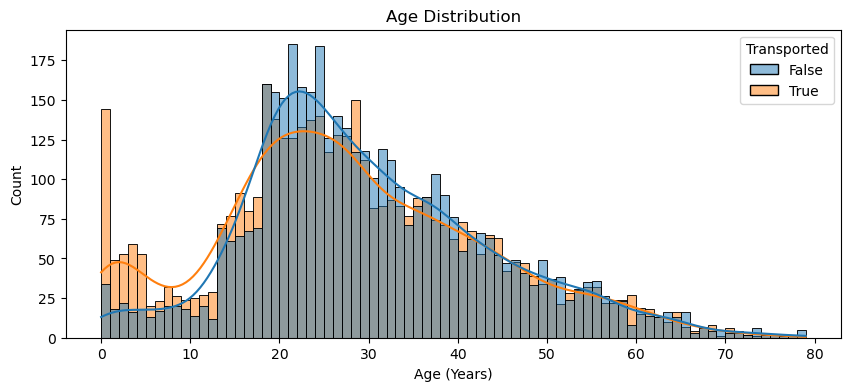

In [6]:
#figure size
plt.figure(figsize=(10,4))

#histogram
sns.histplot(data=train_df, x='Age', hue='Transported', binwidth=1, kde=True)

plt.title('Age Distribution')
plt.xlabel('Age (Years)')

Insights:
* 0-18 years old were more like to be transported to a different dimension than not
* 18 - 25 years old were less likely to be transported to a different dimension than not.
* passengers older than 25 years old were about equally likely to be transported to a different dimension than not.


Thought:
Create a new feature in feature engineering to indicate whether a passenger is a child, young adult, or adult.

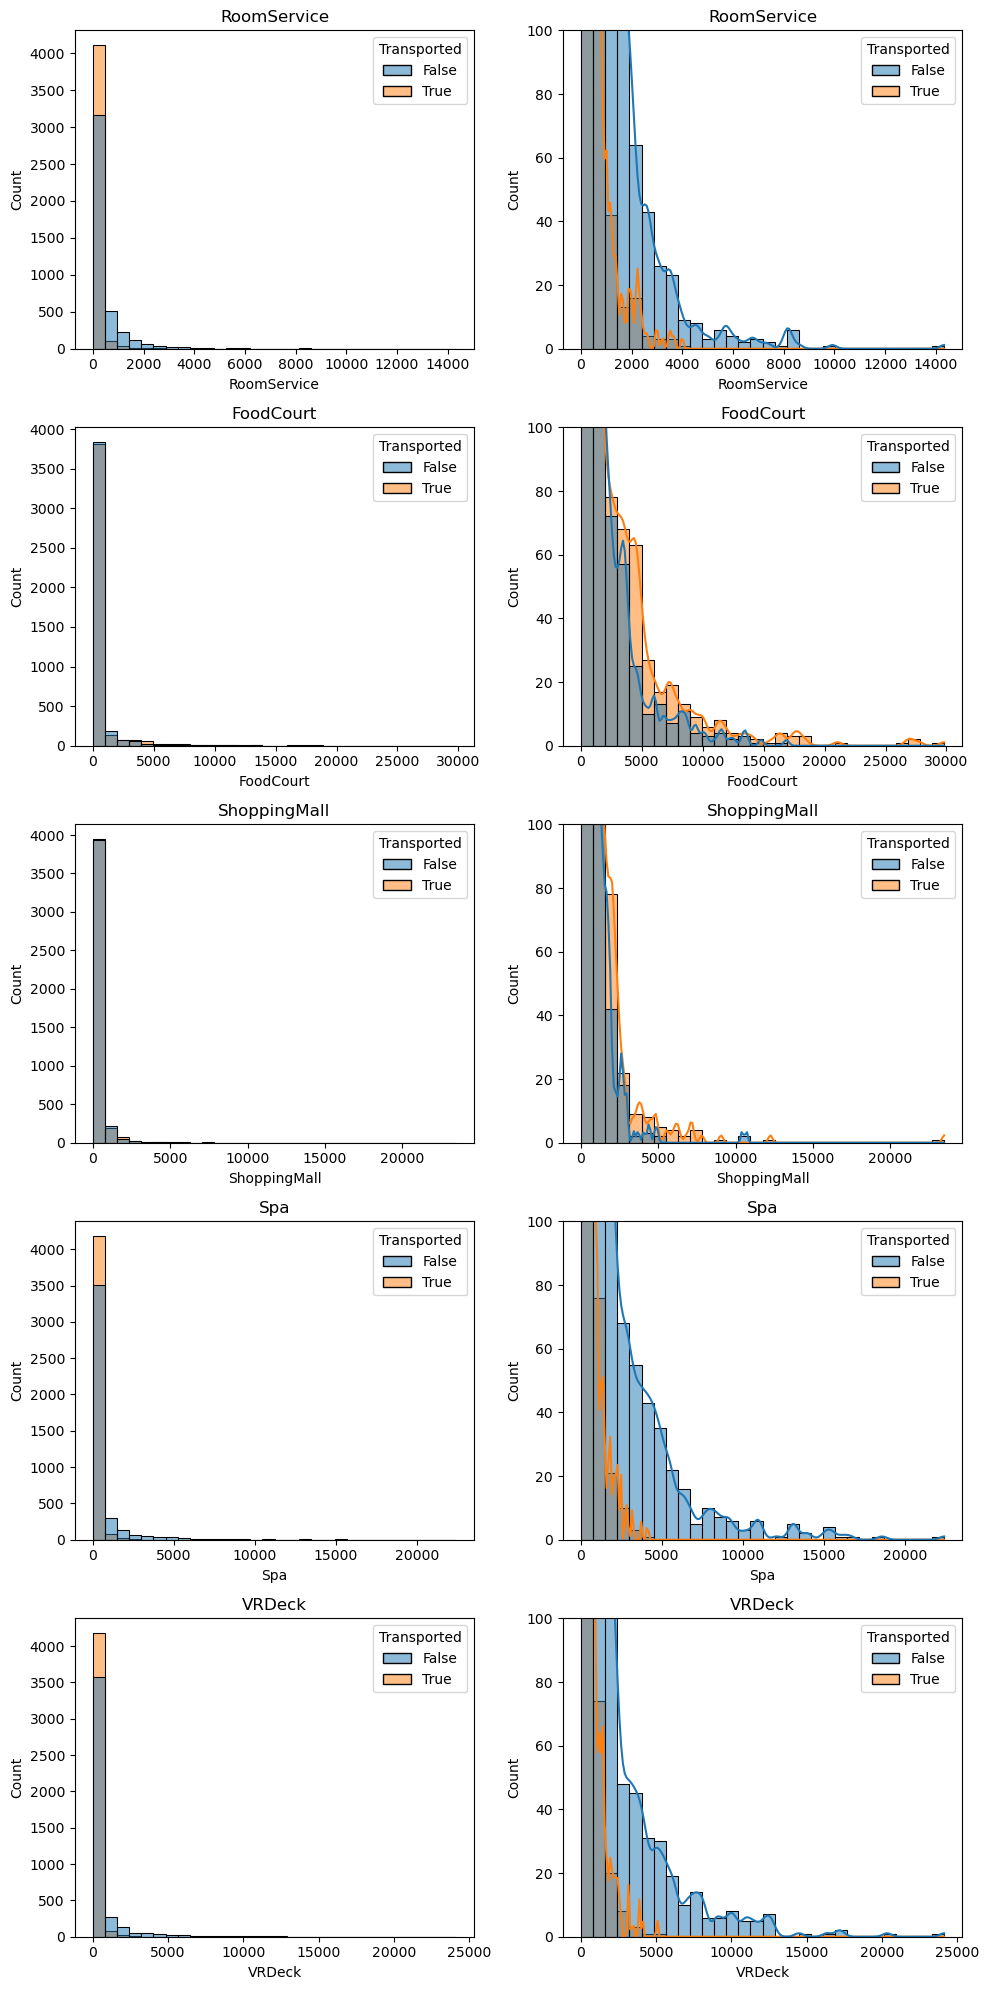

In [7]:
# Now onto expenditures
Exp_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

#plot expenditures features
fig = plt.figure(figsize=(10,20))
for i, var_name in enumerate(Exp_features):
    #left
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=train_df, x=var_name,axes=ax, bins=30, kde=False, hue='Transported')
    ax.set_title(var_name)
    
    
    #right
    ax = fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=train_df, x= var_name, axes=ax, bins=30,kde=True, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(var_name)
    
fig.tight_layout()
plt.show()

Notes:

* Most people dont spend any money on amenities
* People who were transported to a different dimension spend less.

Insight:
* Create a binary feature that tracks if the person has not spent anything at all. (0 total expenditure).

**Categorical features**

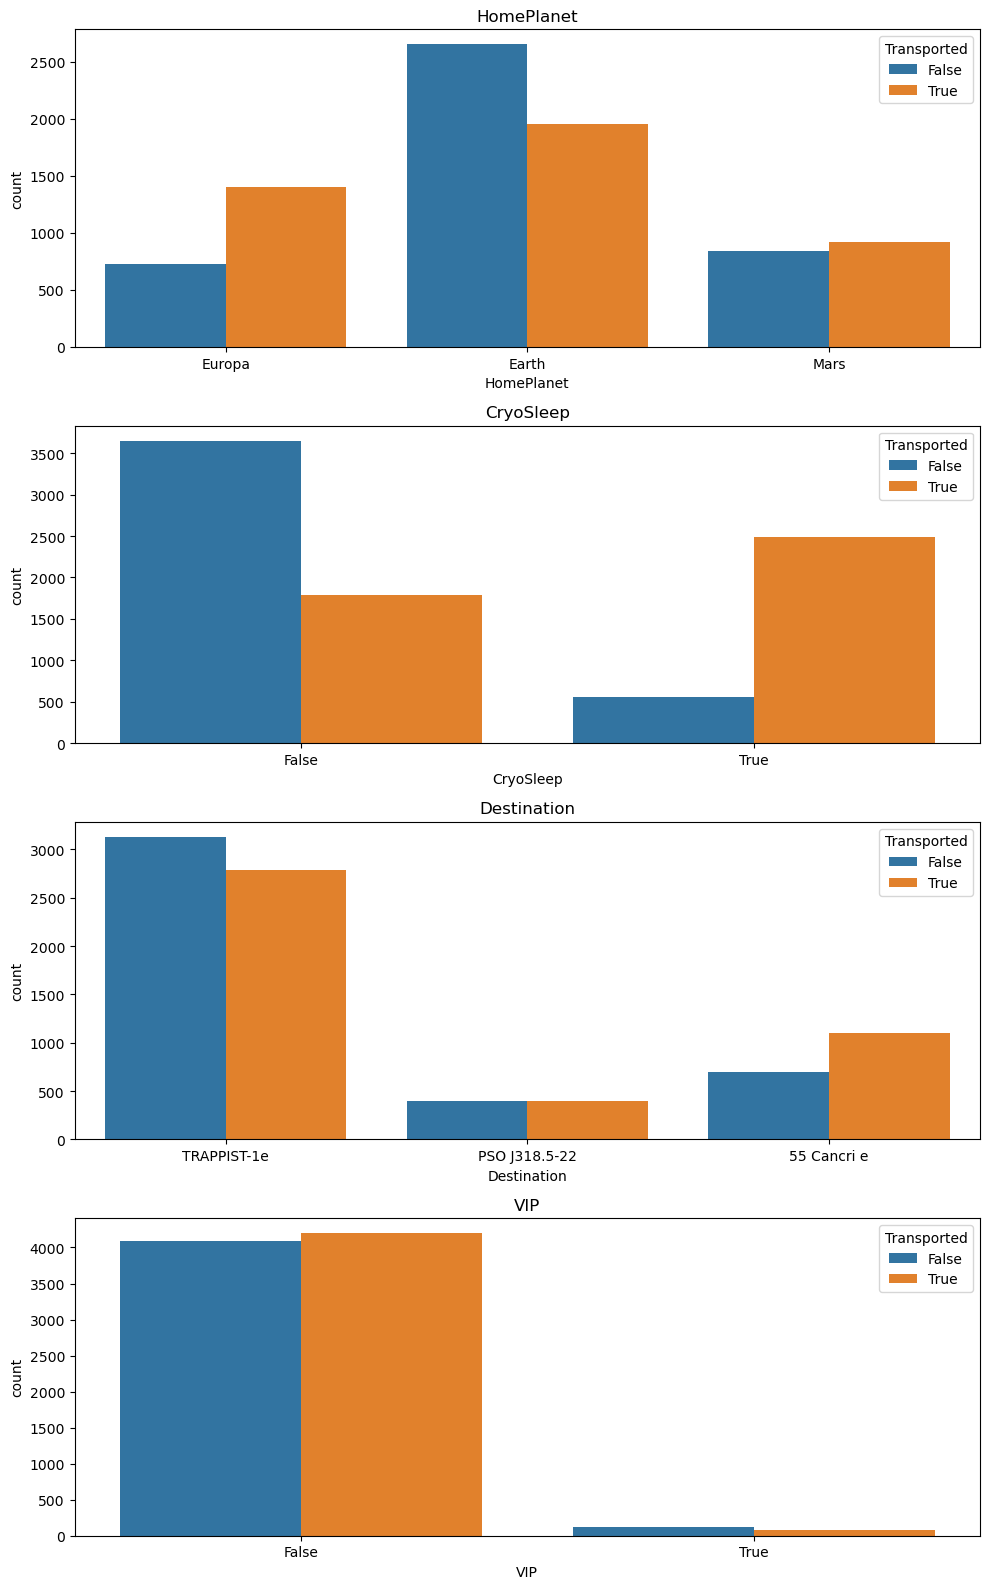

In [8]:
#Categorical features
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

#Plotting categoricals
fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(categorical_features):
    ax = fig.add_subplot(4,1,i+1)
    sns.countplot(data=train_df, x= var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)

fig.tight_layout()
plt.show()

Insights:
HomePlanet: if passenger's home planet is Europa, passenger is less likely to be transported. Whereas, home planet of Earth, passenger is more likely to be transported. Martians are not as indicative of being transported.
CryoSleep: passengers who were in cryosleep are less likely to be transported.
Destination: passengers heading to Trappist were less likely to be transported to a different dimension.
VIP: VIP status is not indicative whether passenger is more likely or less likely to be transported to a different dimension.

**Qualitative features**

In [9]:
#Qualitative features
Qualitative_Features =['PassengerId', 'Cabin', 'Name']

#preview
train_df[Qualitative_Features].head()

,PassengerId,Cabin,Name
0,0001_01,B/0/P,Maham Ofracculy
1,0002_01,F/0/S,Juanna Vines
2,0003_01,A/0/S,Altark Susent
3,0003_02,A/0/S,Solam Susent
4,0004_01,F/1/S,Willy Santantines


Insights:

- extract group and group size from PassengerId feature
- extract deck, numer,and side from cabin feature
- extract surname from name to identify families
